In [ ]:
import pandas as pd

url = "https://github.com/alixagari2000-star/myRawData/raw/refs/heads/main/titanic3.xls"
raw = pd.read_excel(url)
raw

raw.isna().sum()


pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
raw.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [8]:
raw.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [14]:
def tweak_titanic(df):
    return (df
            .loc[:, ['pclass', 'survived', 'age', 'sibsp', 'parch', 
       'fare']]
    )
tweak_titanic(raw)


,pclass,survived,age,sibsp,parch,fare
0,1,1,29.0000,0,0,211.3375
1,1,1,0.9167,1,2,151.5500
2,1,0,2.0000,1,2,151.5500
3,1,0,30.0000,1,2,151.5500
4,1,0,25.0000,1,2,151.5500
...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542
1305,3,0,NaN,1,0,14.4542
1306,3,0,26.5000,0,0,7.2250
1307,3,0,27.0000,0,0,7.2250


In [21]:
# standardize the data  

from sklearn.preprocessing import StandardScaler
# have sklearn output pandas dataframe
from sklearn import set_config

set_config(transform_output="pandas")   

scaler = StandardScaler()
X = scaler.fit_transform(tweak_titanic(raw))

X

,pclass,survived,age,sibsp,parch,fare
0,-1.546098,1.272006,-0.061162,-0.479087,-0.445000,3.441165
1,-1.546098,1.272006,-2.010496,0.481288,1.866526,2.285603
2,-1.546098,-0.786160,-1.935302,0.481288,1.866526,2.285603
3,-1.546098,-0.786160,0.008251,0.481288,1.866526,2.285603
4,-1.546098,-0.786160,-0.338812,0.481288,1.866526,2.285603
...,...,...,...,...,...,...
1304,0.841916,-0.786160,-1.067644,0.481288,-0.445000,-0.364161
1305,0.841916,-0.786160,NaN,0.481288,-0.445000,-0.364161
1306,0.841916,-0.786160,-0.234693,-0.479087,-0.445000,-0.503886
1307,0.841916,-0.786160,-0.199987,-0.479087,-0.445000,-0.503886


In [22]:
X.describe()    

,pclass,survived,age,sibsp,parch,fare
count,1.309000e+03,1309.000000,1.046000e+03,1.309000e+03,1.309000e+03,1.308000e+03
mean,-1.737003e-16,0.000000,-1.358590e-16,-8.142201e-18,1.628440e-17,-8.691654e-17
std,1.000382e+00,1.000382,1.000478e+00,1.000382e+00,1.000382e+00,1.000382e+00
min,-1.546098e+00,-0.786160,-2.062556e+00,-4.790868e-01,-4.449995e-01,-6.435292e-01
25%,-3.520907e-01,-0.786160,-6.164626e-01,-4.790868e-01,-4.449995e-01,-4.909206e-01
50%,8.419164e-01,-0.786160,-1.305744e-01,-4.790868e-01,-4.449995e-01,-3.641609e-01
75%,8.419164e-01,1.272006,6.329641e-01,4.812878e-01,-4.449995e-01,-3.905147e-02
max,8.419164e-01,1.272006,3.478880e+00,7.203909e+00,9.956864e+00,9.258680e+00


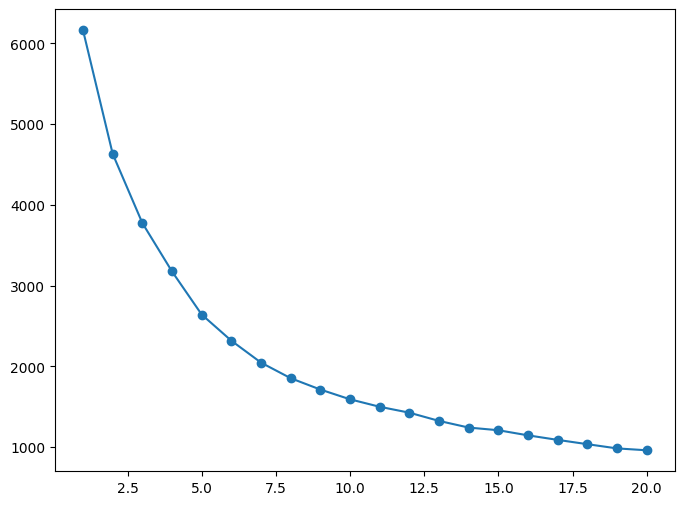

In [28]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
#elbow method to find optimal number of clusters

X_clean = X.dropna()

inertias = []
for i in range(20):
    km=KMeans(n_clusters=i+1, n_init=10,max_iter=300,random_state=42)
    km.fit(X_clean)
    inertias.append(km.inertia_)

#plot the results
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,21), inertias, marker='o')

    